In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1a23d3a37e7ddea421b08fd0d9d8241


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | sola
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | molo
Processing Record 9 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | bowen
Processing Record 13 of Set 1 | sosnovo-ozerskoye
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | rincon
Processing Record 19 of Set 1 | weligama
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | narsaq
Processing R

Processing Record 35 of Set 4 | bandarbeyla
Processing Record 36 of Set 4 | birin
Processing Record 37 of Set 4 | lolua
City not found. Skipping...
Processing Record 38 of Set 4 | rabo de peixe
Processing Record 39 of Set 4 | san cristobal
Processing Record 40 of Set 4 | karamea
City not found. Skipping...
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | vondrozo
Processing Record 44 of Set 4 | la ronge
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | siderno
Processing Record 48 of Set 4 | kasongo-lunda
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | acapulco
Processing Record 1 of Set 5 | kedrovyy
Processing Record 2 of Set 5 | harboore
Processing Record 3 of Set 5 | ayan
Processing Record 4 of Set 5 | brazzaville
Processing Record 5 of Set 5 | barahona
Processing Record 6 of Set 5 | hovd


Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | kota bahru
Processing Record 29 of Set 8 | saint quentin
City not found. Skipping...
Processing Record 30 of Set 8 | babanusah
City not found. Skipping...
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | riachao das neves
Processing Record 33 of Set 8 | oktyabrskoye
Processing Record 34 of Set 8 | pangnirtung
Processing Record 35 of Set 8 | agva
City not found. Skipping...
Processing Record 36 of Set 8 | tashla
Processing Record 37 of Set 8 | manadhoo
Processing Record 38 of Set 8 | the pas
Processing Record 39 of Set 8 | hida
Processing Record 40 of Set 8 | roald
Processing Record 41 of Set 8 | bulolo
Processing Record 42 of Set 8 | vanavara
Processing Record 43 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 8 | kahului
Processing Record 45 of Set 8 | gobabis
Processing Record 46 of Set 8 | trenggalek
Processing Record 47 of Set 8 | kuche
City not found. Skipping..

Processing Record 11 of Set 12 | beringovskiy
Processing Record 12 of Set 12 | porbandar
Processing Record 13 of Set 12 | cheremisinovo
Processing Record 14 of Set 12 | richards bay
Processing Record 15 of Set 12 | ust-kulom
Processing Record 16 of Set 12 | quelimane
Processing Record 17 of Set 12 | horta
Processing Record 18 of Set 12 | labutta
City not found. Skipping...
Processing Record 19 of Set 12 | kutum
Processing Record 20 of Set 12 | katobu
Processing Record 21 of Set 12 | oksfjord
Processing Record 22 of Set 12 | jinchang
Processing Record 23 of Set 12 | wawina
Processing Record 24 of Set 12 | pasvalys
Processing Record 25 of Set 12 | port hardy
Processing Record 26 of Set 12 | mnogovershinnyy
Processing Record 27 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 28 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 29 of Set 12 | esperance
Processing Record 30 of Set 12 | mancio lima
Processing Record 31 of Set 12 | nenjiang
Processing Record 32 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,60.04,54,100,7.52,NZ,2021-04-01 14:17:18
1,New Norfolk,-42.7826,147.0587,59.00,73,100,3.42,AU,2021-04-01 14:17:19
2,Rikitea,-23.1203,-134.9692,74.97,80,100,7.25,PF,2021-04-01 14:17:19
3,Bilibino,68.0546,166.4372,-5.30,94,92,6.69,RU,2021-04-01 14:17:19
4,Ushuaia,-54.8000,-68.3000,46.40,76,0,4.61,AR,2021-04-01 14:13:16
5,Sola,-13.8833,167.5500,81.54,78,100,6.80,VU,2021-04-01 14:17:20
6,Hasaki,35.7333,140.8333,55.40,82,75,8.05,JP,2021-04-01 14:17:20
7,Molo,-0.2479,35.7374,68.00,37,70,12.24,KE,2021-04-01 14:17:20
8,Sao Filipe,14.8961,-24.4956,74.17,68,2,5.84,CV,2021-04-01 14:17:21
9,Hithadhoo,-0.6000,73.0833,84.11,76,100,16.49,MV,2021-04-01 14:17:22


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-04-01 14:17:18,-46.1927,168.8643,60.04,54,100,7.52
1,New Norfolk,AU,2021-04-01 14:17:19,-42.7826,147.0587,59.00,73,100,3.42
2,Rikitea,PF,2021-04-01 14:17:19,-23.1203,-134.9692,74.97,80,100,7.25
3,Bilibino,RU,2021-04-01 14:17:19,68.0546,166.4372,-5.30,94,92,6.69
4,Ushuaia,AR,2021-04-01 14:13:16,-54.8000,-68.3000,46.40,76,0,4.61
...,...,...,...,...,...,...,...,...,...
567,Samarkand,UZ,2021-04-01 14:20:10,39.6542,66.9597,42.80,56,75,23.02
568,Kailua,US,2021-04-01 14:18:29,21.4022,-157.7394,73.40,83,75,8.05
569,Biltine,TD,2021-04-01 14:20:10,14.5333,20.9167,96.49,7,7,8.52
570,Faya,SA,2021-04-01 14:20:10,18.3851,42.4509,77.00,29,20,17.27


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

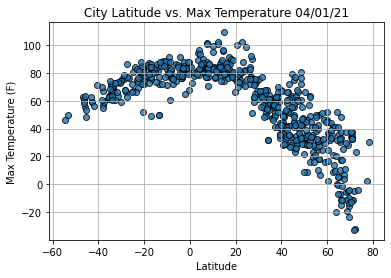

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

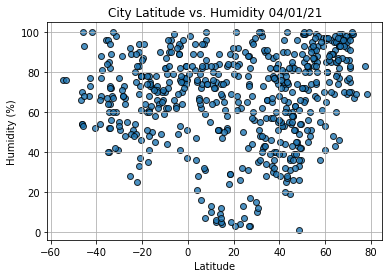

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

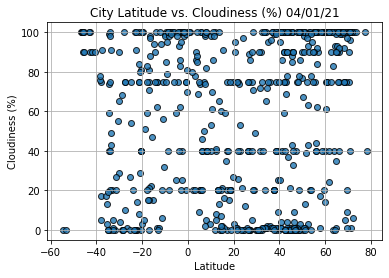

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

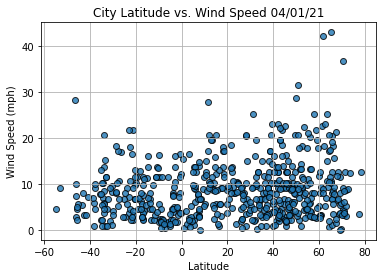

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City               Ribeira Grande
Country                        PT
Date          2021-04-01 14:17:23
Lat                       38.5167
Lng                         -28.7
Max Temp                     62.6
Humidity                       82
Cloudiness                     40
Wind Speed                  17.27
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
567     True
568     True
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Bilibino,RU,2021-04-01 14:17:19,68.0546,166.4372,-5.30,94,92,6.69
6,Hasaki,JP,2021-04-01 14:17:20,35.7333,140.8333,55.40,82,75,8.05
8,Sao Filipe,CV,2021-04-01 14:17:21,14.8961,-24.4956,74.17,68,2,5.84
11,Sosnovo-Ozerskoye,RU,2021-04-01 14:17:23,52.5249,111.5418,16.07,82,3,9.06
13,Ribeira Grande,PT,2021-04-01 14:17:23,38.5167,-28.7000,62.60,82,40,17.27
...,...,...,...,...,...,...,...,...,...
567,Samarkand,UZ,2021-04-01 14:20:10,39.6542,66.9597,42.80,56,75,23.02
568,Kailua,US,2021-04-01 14:18:29,21.4022,-157.7394,73.40,83,75,8.05
569,Biltine,TD,2021-04-01 14:20:10,14.5333,20.9167,96.49,7,7,8.52
570,Faya,SA,2021-04-01 14:20:10,18.3851,42.4509,77.00,29,20,17.27


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Bilibino,RU,2021-04-01 14:17:19,68.0546,166.4372,-5.30,94,92,6.69
6,Hasaki,JP,2021-04-01 14:17:20,35.7333,140.8333,55.40,82,75,8.05
8,Sao Filipe,CV,2021-04-01 14:17:21,14.8961,-24.4956,74.17,68,2,5.84
11,Sosnovo-Ozerskoye,RU,2021-04-01 14:17:23,52.5249,111.5418,16.07,82,3,9.06
13,Ribeira Grande,PT,2021-04-01 14:17:23,38.5167,-28.7000,62.60,82,40,17.27


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

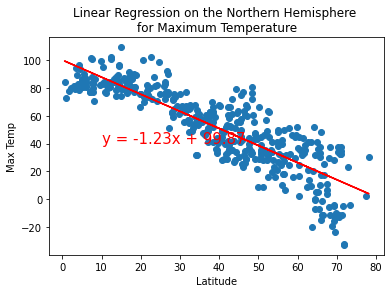

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", 'Max Temp',(10,40))

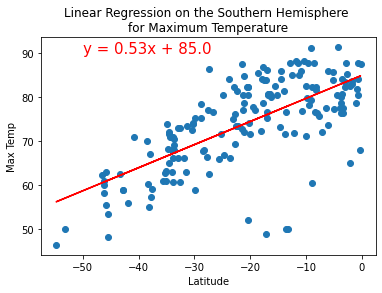

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

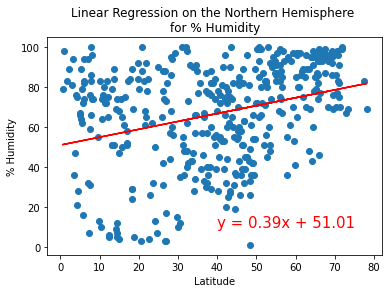

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

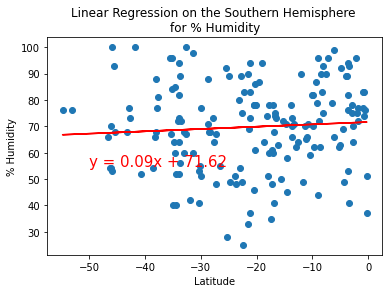

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,55))

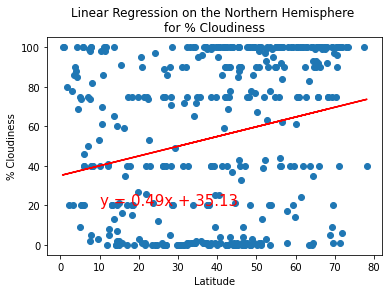

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,20))

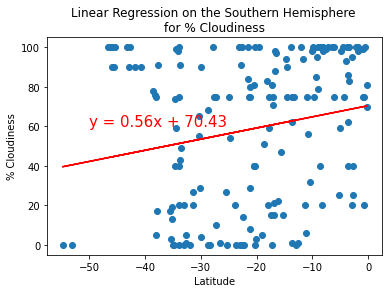

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Cloudiness", "% Cloudiness",(-50,60))

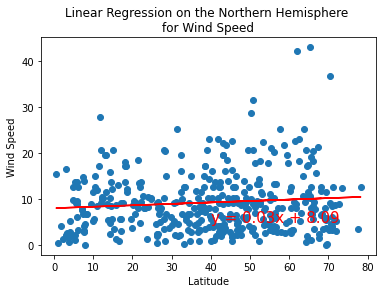

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,5))

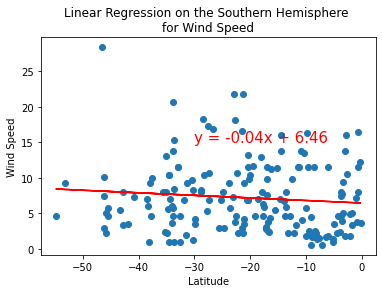

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-30,15))